In [1]:
from matplotlib import scale
from scipy.sparse import data
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as pp

df = pd.read_csv('C:\AllDesktop\Prog\python\MANAS\DataSheets\income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


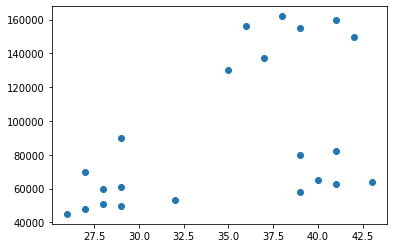

In [2]:
pp.scatter(df['Age'], df['Income($)'])
pp.show()

In [3]:
km = KMeans(n_clusters=3)

y_predicted = km.fit_predict(df[['Age', 'Income($)']]) 

print(y_predicted)

[2 2 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 0]


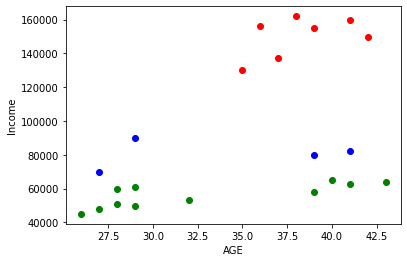

In [4]:
df['Cluster'] = y_predicted

df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

pp.scatter(df1.Age, df1['Income($)'], color='green')
pp.scatter(df2.Age, df2['Income($)'], color='red')
pp.scatter(df3.Age, df3['Income($)'], color='blue')
# we are gonna get a problem in the clusters as the income column is not scaled!
# when we dont scale our features properly, we might run into this problem


pp.xlabel('AGE')
pp.ylabel('Income')
pp.show()

In [8]:
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)', 'Age']])
df

,Name,Age,Income($),Cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [10]:
df.Age = scaler.fit_transform(df[['Age', 'Income($)']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [16]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [12]:
df['Cluster'] = y_predicted
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


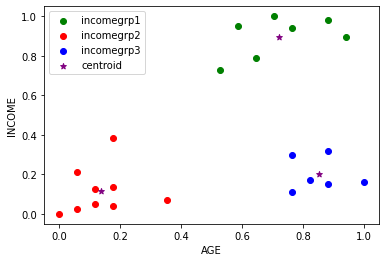

In [21]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

pp.scatter(df1.Age, df1['Income($)'], color='green', label = 'incomegrp1')
pp.scatter(df2.Age, df2['Income($)'], color='red', label = 'incomegrp2')
pp.scatter(df3.Age, df3['Income($)'], color='blue', label = 'incomegrp3')
pp.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')

pp.xlabel('AGE')
pp.ylabel('INCOME')
pp.legend()

In [25]:
k_rng = range(1, 10)
sse = [] # we will find sse for k = 1, then for k = 2 and keep storing it in sse

for i in k_rng:
    km1 = KMeans(n_clusters=i)
    km1.fit(df[['Age', 'Income($)']])
    sse.append(km1.inertia_)

In [26]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.27558255687229766,
 0.22020960864009398,
 0.1685851223602976,
 0.13265419827245162,
 0.10383752586603562]

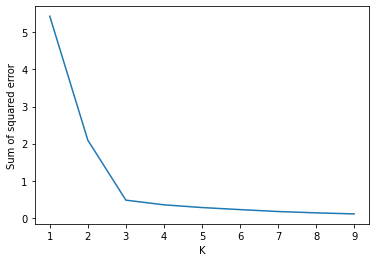

In [27]:
pp.xlabel('K')
pp.ylabel('Sum of squared error')
pp.plot(k_rng, sse)